In [118]:
# Loading required libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import shap
import seaborn as sns
import numpy as np

In [119]:
# install shap
pip install shap


SyntaxError: invalid syntax (2466250180.py, line 2)

In [120]:
# Load the dataset
df= pd.read_excel("C:/Users/Viswanathan/Desktop/Gestational Diabetic Data Set.xlsx")


In [121]:
# Identifying data types in the dataset
df.dtypes

Case Number                          int64
Age                                  int64
No of Pregnancy                      int64
Gestation in previous Pregnancy      int64
BMI                                float64
HDL                                float64
Family History                       int64
unexplained prenetal loss            int64
Large Child or Birth Default         int64
PCOS                                 int64
Sys BP                             float64
Dia BP                               int64
OGTT                               float64
Hemoglobin                         float64
Sedentary Lifestyle                  int64
Prediabetes                          int64
Class Label(GDM /Non GDM)            int64
dtype: object

In [122]:
# Identifying data types and attribute counts in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case Number                      3525 non-null   int64  
 1   Age                              3525 non-null   int64  
 2   No of Pregnancy                  3525 non-null   int64  
 3   Gestation in previous Pregnancy  3525 non-null   int64  
 4   BMI                              2444 non-null   float64
 5   HDL                              2524 non-null   float64
 6   Family History                   3525 non-null   int64  
 7   unexplained prenetal loss        3525 non-null   int64  
 8   Large Child or Birth Default     3525 non-null   int64  
 9   PCOS                             3525 non-null   int64  
 10  Sys BP                           1820 non-null   float64
 11  Dia BP                           3525 non-null   int64  
 12  OGTT                

In [123]:
# Finding central tendency
import pandas

pandas.set_option('display.width', 150)
description = df.describe()
print(description)


       Case Number          Age  No of Pregnancy  Gestation in previous Pregnancy          BMI          HDL  Family History  \
count  3525.000000  3525.000000      3525.000000                      3525.000000  2444.000000  2524.000000     3525.000000   
mean   1763.000000    32.581277         2.076312                         0.960851    27.854092    46.471870        0.498156   
std    1017.724177     6.169107         0.838637                         0.722313     5.714737    10.800813        0.500068   
min       1.000000    20.000000         1.000000                         0.000000    13.300000    15.000000        0.000000   
25%     882.000000    28.000000         1.000000                         0.000000    24.400000    42.000000        0.000000   
50%    1763.000000    32.000000         2.000000                         1.000000    27.500000    49.000000        0.000000   
75%    2644.000000    37.000000         3.000000                         1.000000    31.000000    55.000000    

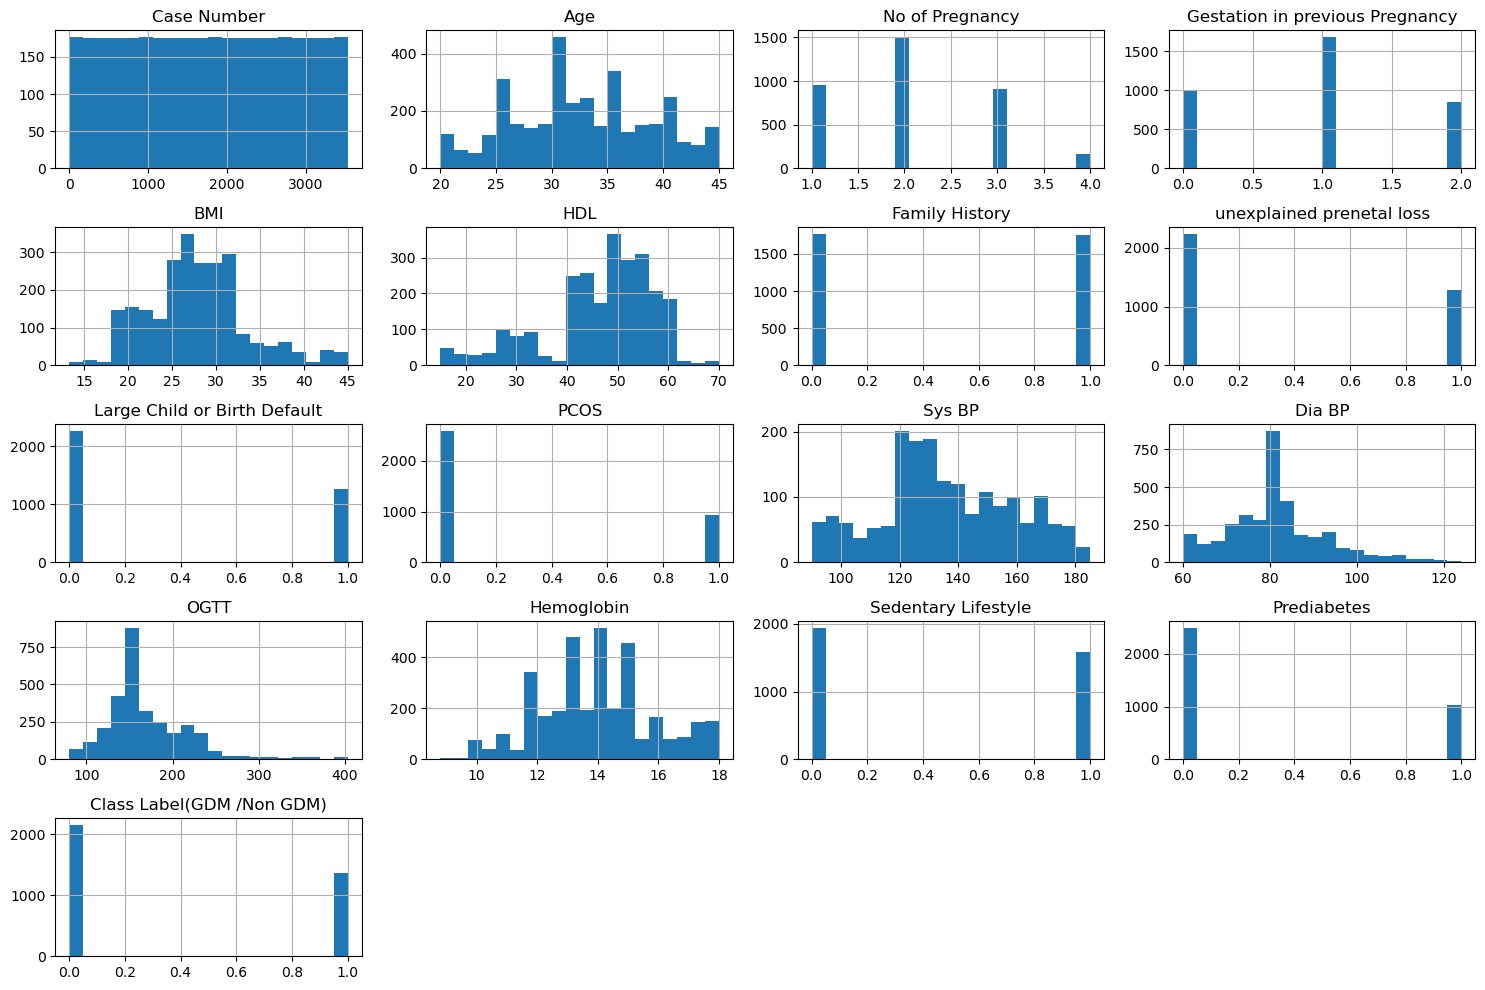

In [124]:
# Finding data distribution
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

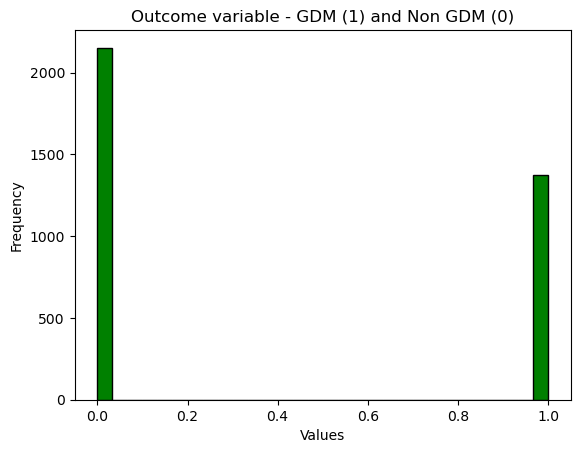

In [6]:
 # Univariate Analysis

plt.hist(df["Outcome"], bins=30, color='green', edgecolor='black')
 

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Outcome variable - GDM (1) and Non GDM (0)')
 

plt.show()

In [9]:
# Finding skewness in the dataset
skew = df.skew()
print(skew)

Age                                0.050452
No of Pregnancy                    0.317600
Gestation in previous Pregnancy    0.058916
BMI                                0.524710
HDL                               -0.917368
Family History                     0.006813
unexplained prenetal loss          0.561399
Large Child or Birth Default       0.593407
PCOS                               1.066829
Sys BP                             0.087402
Dia BP                             0.695347
OGTT                               1.495513
Hemoglobin                         0.187583
Sedentary Lifestyle                0.202015
Prediabetes                        0.909296
Outcome                            0.454131
dtype: float64


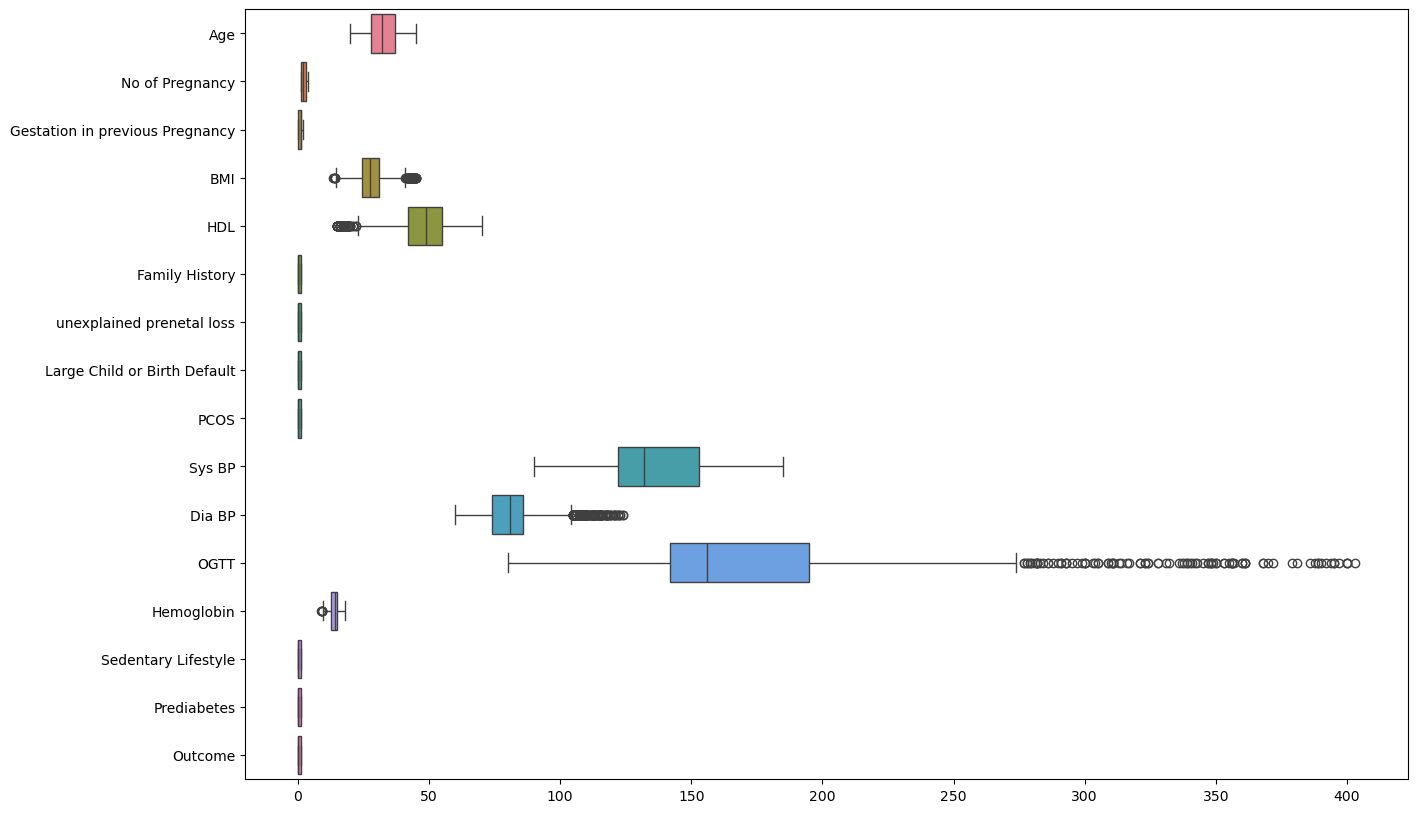

In [11]:
# To find the outlier in the numerical data
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.show()

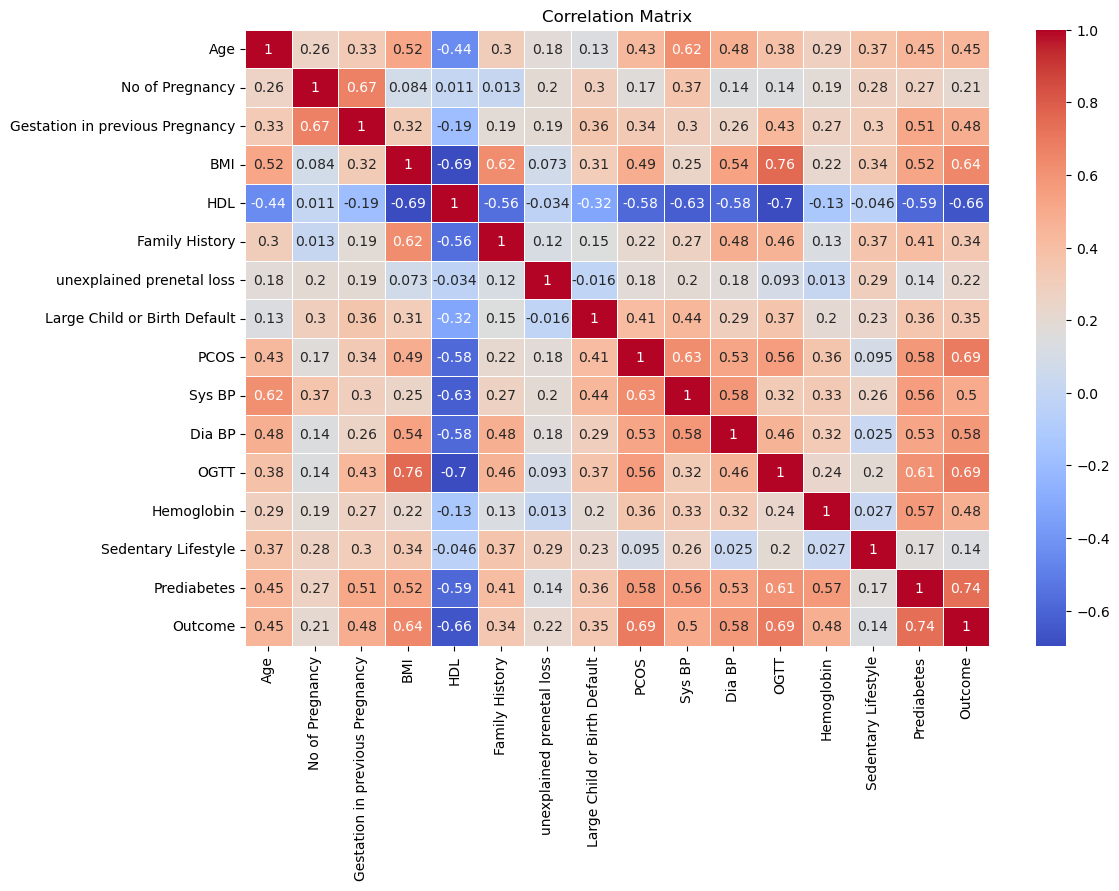

In [12]:
# Multivariate analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

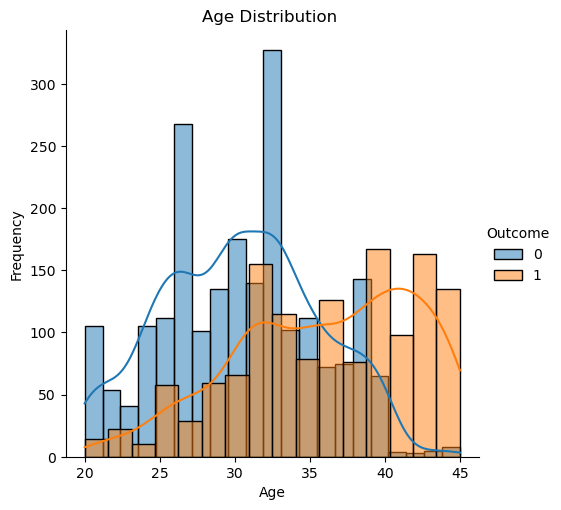

In [19]:
# Correlation between Age and GDM
sns.FacetGrid(df, hue="Outcome", height=5).map(sns.histplot, "Age", kde=True).add_legend()
plt.title('Age Distribution ')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Dropping few columns from the dataset
df=df.drop(['HDL', 'unexplained prenetal loss','Sys BP','Dia BP','OGTT', 'Hemoglobin','Sedentary Lifestyle','Prediabetes'],axis=1)
print(df)


      Age  No of Pregnancy  Gestation in previous Pregnancy   BMI  \
0      22                2                                1   NaN   
1      26                2                                1   NaN   
2      29                1                                0   NaN   
3      28                2                                1   NaN   
4      21                2                                1   NaN   
...   ...              ...                              ...   ...   
3519   31                4                                1  24.1   
3520   26                3                                1  34.5   
3521   35                2                                2  23.6   
3522   37                2                                0  23.3   
3523   43                2                                0  28.6   

      Family History  Large Child or Birth Default  PCOS  Outcome  
0                  0                             0     0        0  
1                  0               

In [8]:
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              3524 non-null   int64  
 1   No of Pregnancy                  3524 non-null   int64  
 2   Gestation in previous Pregnancy  3524 non-null   int64  
 3   BMI                              2444 non-null   float64
 4   Family History                   3524 non-null   int64  
 5   Large Child or Birth Default     3524 non-null   int64  
 6   PCOS                             3524 non-null   int64  
 7   Outcome                          3524 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 220.4 KB


In [9]:
# Recursive Feature elimination to find out the relevant features in association with the GDM
X=df[["Age", "No of Pregnancy", "Gestation in previous Pregnancy","Family History", "Large Child or Birth Default", "PCOS"]]
y=df["Outcome"]
from sklearn.feature_selection import RFE

from sklearn.svm import SVR
estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=5, step=1)

selector.fit(X, y)

print(selector.support_)

print(selector.ranking_)


[ True  True  True  True False  True]
[1 1 1 1 2 1]


In [10]:

X=df[["Age", "No of Pregnancy", "Gestation in previous Pregnancy","BMI","Family History", "Large Child or Birth Default", "PCOS"]]
y=df["Outcome"]

In [11]:
# Splitting dataset in to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1762, 7)
X_test shape: (1762, 7)
y_train shape: (1762,)
y_test shape: (1762,)


In [12]:

X_train.isnull().sum()







Age                                  0
No of Pregnancy                      0
Gestation in previous Pregnancy      0
BMI                                546
Family History                       0
Large Child or Birth Default         0
PCOS                                 0
dtype: int64

In [14]:
X_test.isnull().sum()

Age                                  0
No of Pregnancy                      0
Gestation in previous Pregnancy      0
BMI                                534
Family History                       0
Large Child or Birth Default         0
PCOS                                 0
dtype: int64

In [13]:
y_train.isnull().sum()

0

In [15]:
y_test.isnull().sum()

0

In [16]:
# Replacing missing value with mean imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X_train[["BMI"]],X_test[["BMI"]])
X_train["BMI"] = imputer.transform(X_train[["BMI"]])
X_test["BMI"] = imputer.transform(X_test[["BMI"]])


In [17]:
X_train.isnull().sum()

Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
Family History                     0
Large Child or Birth Default       0
PCOS                               0
dtype: int64

In [18]:
X_test.isnull().sum()

Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
Family History                     0
Large Child or Birth Default       0
PCOS                               0
dtype: int64

In [27]:
# Finding out the optimal paratmeter for the model
# AdaBoost parameters
model = AdaBoostClassifier()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best: 0.962724 using {'learning_rate': 1.0, 'n_estimators': 50}
0.898993 (0.016641) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.898993 (0.016641) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.898993 (0.016641) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.898993 (0.016641) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.898993 (0.016641) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.898993 (0.016641) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.898993 (0.016641) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.898993 (0.016641) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.898993 (0.016641) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.898993 (0.016641) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.912047 (0.020003) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.937962 (0.021217) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.912047 (0.020003) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.940041 

In [28]:
# Random Forest Parameters
rfc = RandomForestClassifier()
forest_params = {
    'bootstrap': [True,False],
    'max_depth': [2,4],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2],
    'n_estimators': [100]
}

Randomforest = GridSearchCV(rfc, param_grid= forest_params, cv = 10, n_jobs=-1,verbose=2)

Randomforest.fit(X_train, y_train)
print(Randomforest.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Viswanath

{'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [29]:
# Logistic Regression Parameters
LR = LogisticRegression()
LR_params=  {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100]}
Logisticregressionclassifier = GridSearchCV(estimator=LR, param_grid = LR_params, cv = 10, verbose=True, n_jobs=-1)
Logisticregressionclassifier.fit(X_train,y_train)
print(Logisticregressionclassifier.best_params_)


Fitting 10 folds for each of 400 candidates, totalling 4000 fits
{'C': 11.288378916846883, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2600 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py", lin

In [30]:
# Naive Bayes Parameters
NB=GaussianNB()
NB_params = {'var_smoothing': np.logspace(0,-9, num=100)}
Naivebayes=GridSearchCV(estimator=NB, 
                     param_grid=NB_params, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')
Naivebayes.fit(X_train,y_train)
print(Naivebayes.best_params_)
print(Naivebayes.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.0004328761281083057}
GaussianNB(var_smoothing=0.0004328761281083057)


In [ ]:
# Support Vector machine parameters
svc=SVC()
svc_params = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','rbf','poly','sigmoid']}  
  
Supportvectorclassifier = GridSearchCV(estimator=svc, param_grid=svc_params, refit = True, verbose = 3) 
Supportvectorclassifier.fit(X_train,y_train)
print(Supportvectorclassifier.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.946 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.958 total time= 2.2min
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [20]:
# Support Vector machine Parameters
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()
Dtree_params= {
    'max_depth': [10, 20, 30,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }
Decisiontree = GridSearchCV(Dtree, param_grid= Dtree_params, cv = 10, scoring='accuracy')
Decisiontree.fit(X_train, y_train)
print(Decisiontree.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Train and testing Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap = True, max_depth = 4, max_features = "sqrt", min_samples_leaf = 2, min_samples_split = 2, n_estimators= 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2)

In [25]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Training Accuracy =", format(metrics.accuracy_score(y_train, rfc_train)))

Training Accuracy = 0.9585698070374574


In [26]:
rfc_predictions = rfc.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, rfc_predictions)))

Test Accuracy = 0.9517593643586834


In [35]:
# Train and testing Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth= 20, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test,dtree_predictions)))

Test Accuracy = 0.9693530079455165


In [36]:
# Train and testing SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
svc_model = SVC(C=0.1, gamma=1, kernel="linear")
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, svc_pred)))

Test Accuracy = 0.9262202043132803


In [37]:
# Train and testing Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=545.5594781168514, max_iter =100, penalty= 'l1', solver= 'liblinear')

LR.fit(X_train, y_train)
LR_predictions = LR.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test,LR_predictions)))

Test Accuracy = 0.9233825198637912


In [87]:
# Train and testing Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
Naivebayes = GaussianNB(var_smoothing=0.0001873817422860383)
Naivebayes.fit(X_train, y_train)
Naivebayes_pred =Naivebayes.predict(X_test)
print ("Test Accuracy:", metrics.accuracy_score (y_test, Naivebayes_pred))

Test Accuracy: 0.9177071509648127


In [39]:
# Train and testing AdaBoost
from sklearn.ensemble import AdaBoostClassifier
AdaB = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1.0)
AdaB.fit(X_train, y_train)
AdaB_predictions = AdaB.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test,AdaB_predictions)))

C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy = 0.9466515323496028


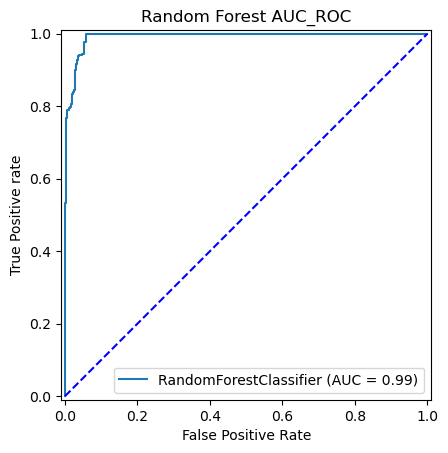

In [44]:
# Evaluation of model Performances by AUC_ROC 
# Random Forest AUC_ROC
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("Random Forest AUC_ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

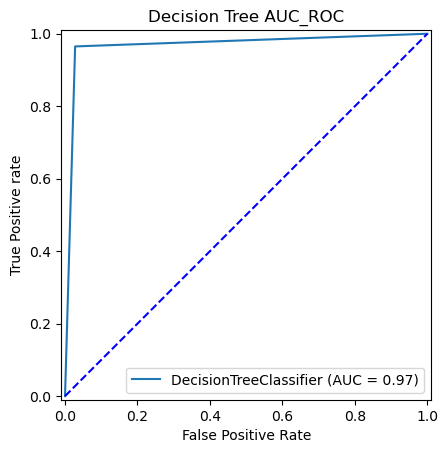

In [45]:
# Decision Tree AUC_ROC
from sklearn.metrics import RocCurveDisplay
dtree_disp = RocCurveDisplay.from_estimator(dtree, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("Decision Tree AUC_ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

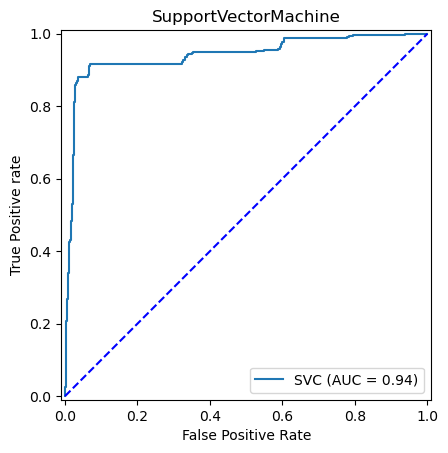

In [46]:
# Support Vector Machine AUC_ROC
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(svc_model, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("SupportVectorMachine")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

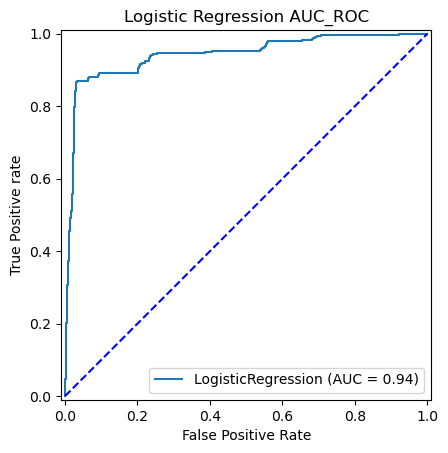

In [47]:
# Logistic Regression AUC_ROC
from sklearn.metrics import RocCurveDisplay
LR_disp = RocCurveDisplay.from_estimator(LR, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("Logistic Regression AUC_ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

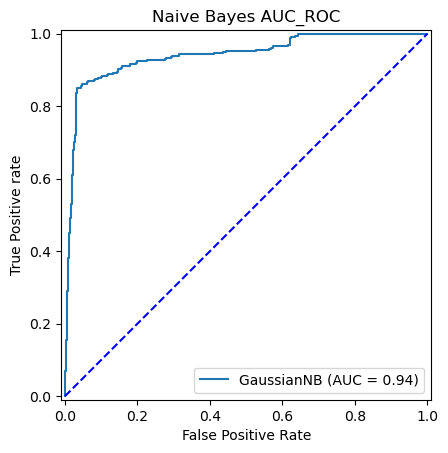

In [48]:
# Naive Bayes AUC_ROC
from sklearn.metrics import RocCurveDisplay
Naivebayes_disp = RocCurveDisplay.from_estimator(Naivebayes, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("Naive Bayes AUC_ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

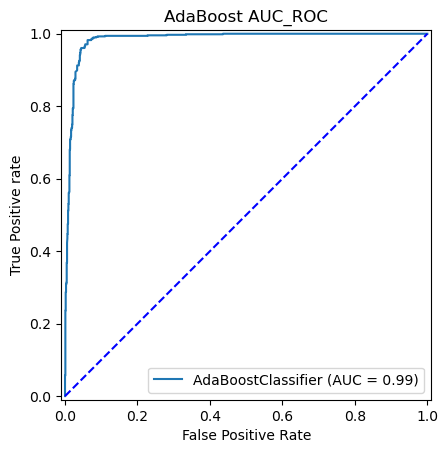

In [49]:
# AdaBoost AUC_ROC
sklearn.metrics import RocCurveDisplay
AdaB_disp = RocCurveDisplay.from_estimator(AdaB, X_test, y_test)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("AdaBoost AUC_ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

0.9852662652952843 0.9687672732396199 0.9417058645019346 0.9919391548440938 0.9412791138760337


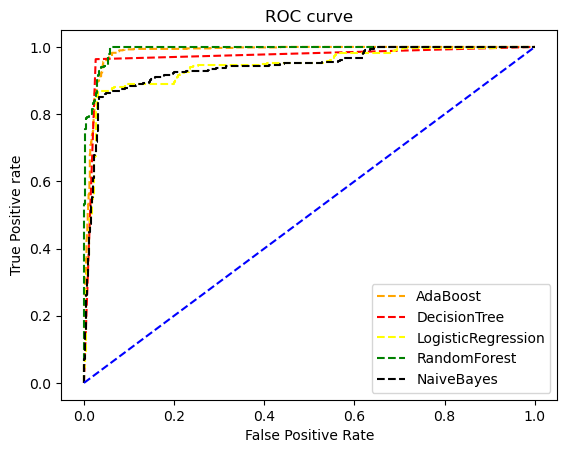

In [67]:
#Comparison of AUC_ROC results across all models
from sklearn.metrics import RocCurveDisplay
# predict probabilities
pred_prob1 = AdaB.predict_proba(X_test)
pred_prob2 = dtree.predict_proba(X_test)
pred_prob3 = LR.predict_proba(X_test)
pred_prob4 = rfc.predict_proba(X_test)
pred_prob5 = Naivebayes.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

print(auc_score1,auc_score2, auc_score3, auc_score4, auc_score5)
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AdaBoost')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='DecisionTree')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='LogisticRegression')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='RandomForest')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='NaiveBayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Text(0.5, 1.0, 'Random Forest Feature Importance')

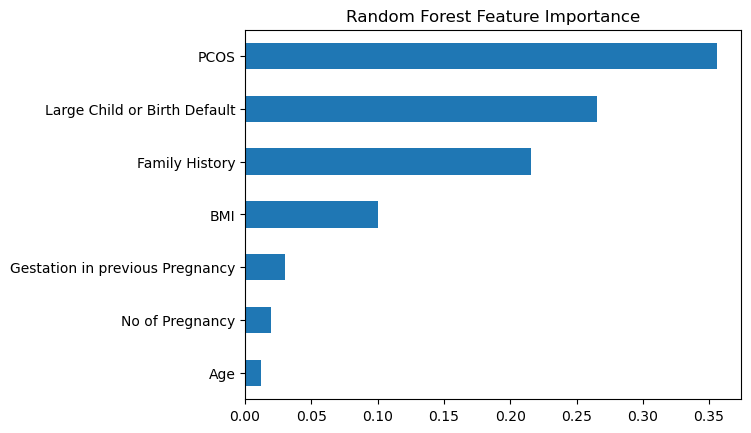

In [26]:
# Plotting feature importance
# Random Forest Feature Importance
rfc.feature_importances_
sorted_idx = rfc.feature_importances_.argsort()
pd.Series(rfc.feature_importances_[sorted_idx],index=X.columns).plot(kind='barh')
plt.title("Random Forest Feature Importance")

Text(0.5, 1.0, 'Decision Tree Feature Importance')

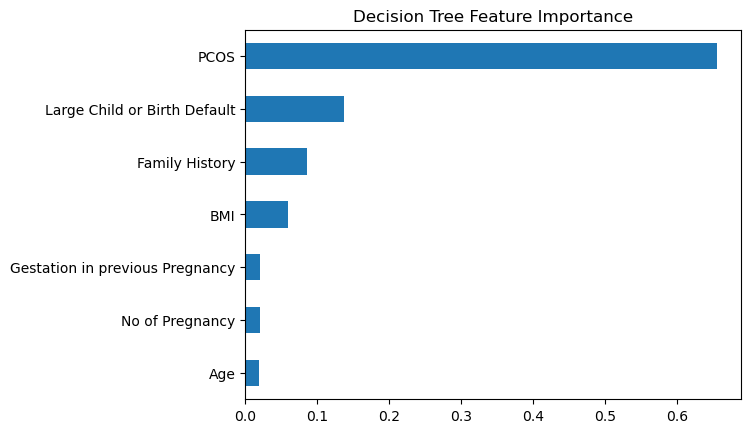

In [50]:
# Decision Tree Feature Importance

dtree.feature_importances_
sorted_idx = dtree.feature_importances_.argsort()
pd.Series(dtree.feature_importances_[sorted_idx],index=X.columns).plot(kind='barh')
plt.title("Decision Tree Feature Importance")

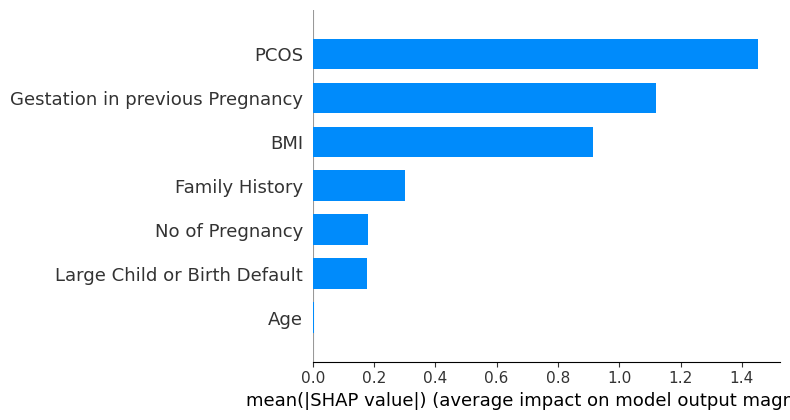

In [65]:
# SHAP GRAPH
# Logistic Regression Shap graph
import shap
explainer = shap.Explainer(LR, X_train, check_additivity=False)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,plot_type="bar")


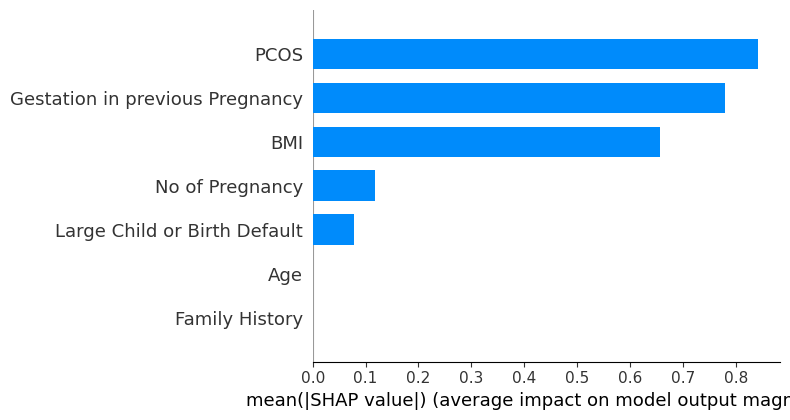

In [66]:
# SVC Shap graph
explainer = shap.Explainer(svc_model, X_train, check_additivity=False)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,plot_type="bar")

([0.11931818181818182,
  0.11363636363636363,
  0.10416666666666667,
  0.09232954545454546,
  0.07832009080590238,
  0.07663197729422895,
  0.07218167072181671,
  0.07026259758694109,
  0.06687697160883281,
  0.06696935300794551],
 [0.12996594778660614,
  0.10102156640181612,
  0.09648127128263337,
  0.0891032917139614,
  0.07604994324631101,
  0.07491486946651532,
  0.07377979568671963,
  0.07377979568671963,
  0.07377979568671963,
  0.07377979568671963])

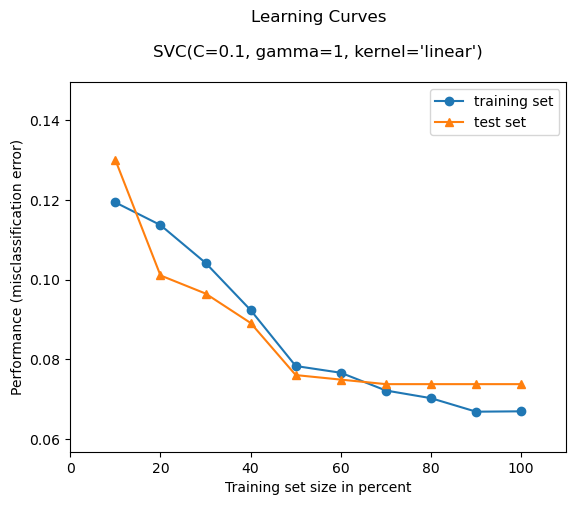

In [51]:
# Plotting learning curves
pip install mlxtend 
from mlxtend.plotting import plot_learning_curves
# SVC learning curve
plot_learning_curves(X_train, y_train, X_test, y_test, svc_model)

([0.03409090909090909,
  0.03409090909090909,
  0.04734848484848485,
  0.045454545454545456,
  0.04426787741203178,
  0.04446546830652791,
  0.047039740470397405,
  0.0454222853087296,
  0.0416403785488959,
  0.04029511918274688],
 [0.07434733257661748,
  0.05051078320090806,
  0.05278093076049943,
  0.051645856980703744,
  0.051645856980703744,
  0.04937570942111237,
  0.04880817253121453,
  0.04767309875141884,
  0.04937570942111237,
  0.048240635641316684])

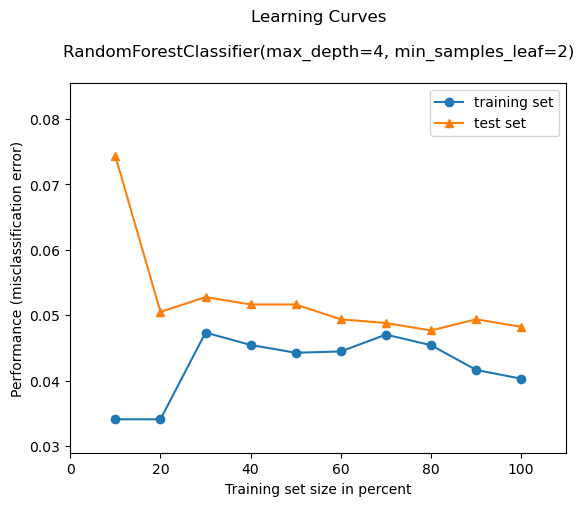

In [116]:

# Random Forest learning curve

plot_learning_curves(X_train, y_train, X_test, y_test, rfc)

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.06299659477866061,
  0.04029511918274688,
  0.026106696935300794,
  0.027809307604994324,
  0.036322360953461974,
  0.027809307604994324,
  0.02894438138479001,
  0.03575482406356413,
  0.03178206583427923,
  0.030079455164585697])

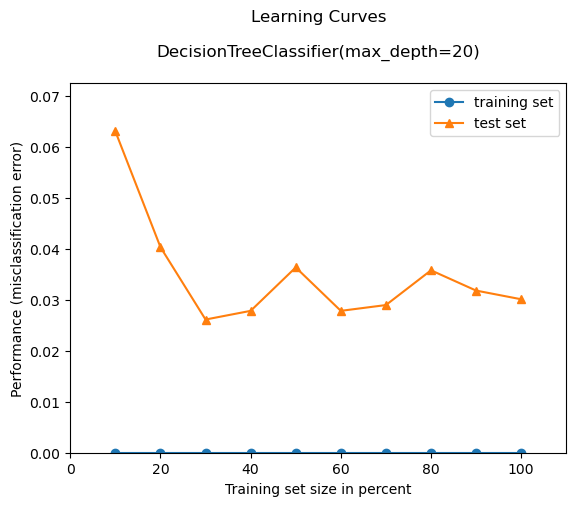

In [52]:
# Decision Tree learning curve
plot_learning_curves(X_train, y_train, X_test, y_test, dtree)


([0.03977272727272727,
  0.08238636363636363,
  0.08522727272727272,
  0.07954545454545454,
  0.08059023836549375,
  0.08325449385052035,
  0.07380373073803731,
  0.07381121362668559,
  0.07318611987381704,
  0.07150964812712826],
 [0.07434733257661748,
  0.08626560726447219,
  0.08569807037457434,
  0.08342792281498297,
  0.08229284903518728,
  0.08399545970488081,
  0.07491486946651532,
  0.07491486946651532,
  0.0771850170261067,
  0.07661748013620885])

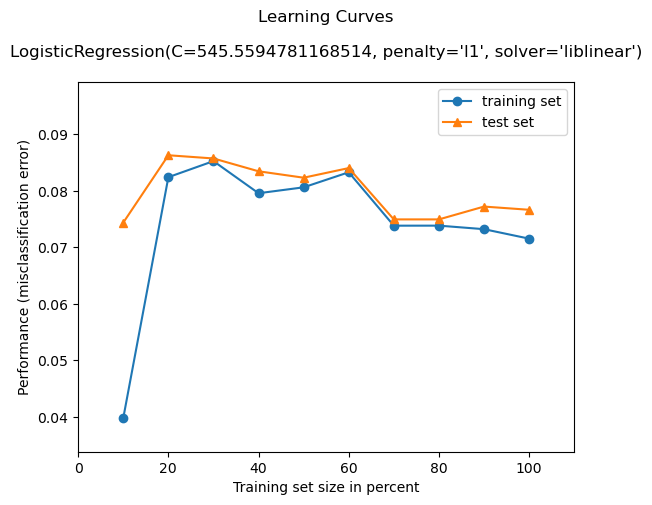

In [53]:
# Logistic Regression learning curve
plot_learning_curves(X_train, y_train, X_test, y_test, LR)

([0.07386363636363637,
  0.10227272727272728,
  0.09090909090909091,
  0.08806818181818182,
  0.09080590238365494,
  0.09271523178807947,
  0.08759124087591241,
  0.085166784953868,
  0.08012618296529968,
  0.08059023836549375],
 [0.09194097616345062,
  0.09023836549375709,
  0.08172531214528944,
  0.08399545970488081,
  0.0851305334846765,
  0.08626560726447219,
  0.08172531214528944,
  0.08172531214528944,
  0.08229284903518728,
  0.08229284903518728])

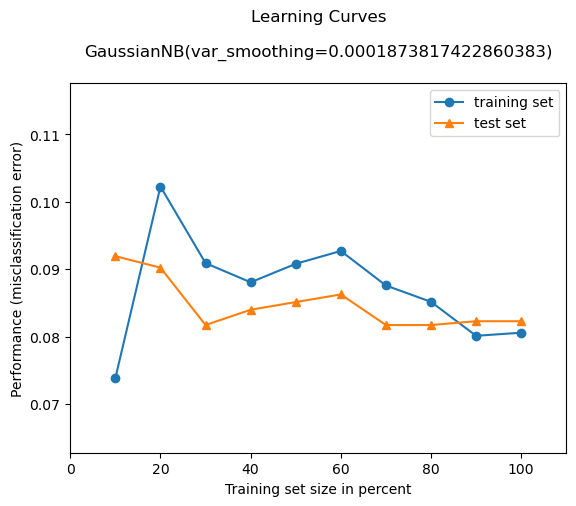

In [54]:
# Naive Bayes learning curve
plot_learning_curves(X_train, y_train, X_test, y_test, Naivebayes)

C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  war

([0.0,
  0.008522727272727272,
  0.017045454545454544,
  0.03551136363636364,
  0.02724177071509648,
  0.027436140018921477,
  0.030008110300081103,
  0.0319375443577005,
  0.029022082018927444,
  0.028376844494892167],
 [0.05959137343927355,
  0.060158910329171394,
  0.058456299659477864,
  0.06129398410896708,
  0.053348467650397274,
  0.055051078320090804,
  0.04767309875141884,
  0.05448354143019296,
  0.05448354143019296,
  0.053348467650397274])

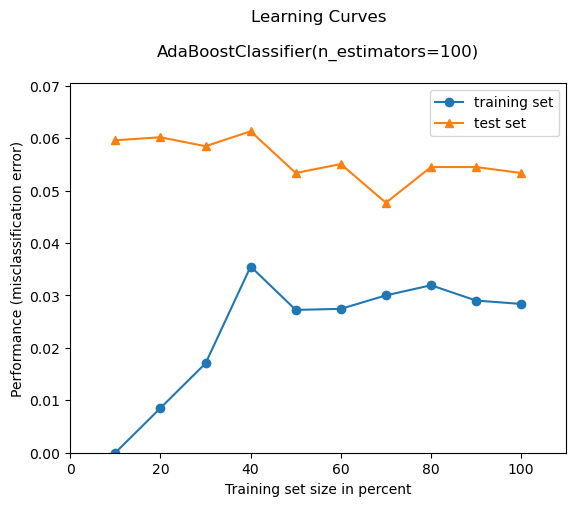

In [55]:
# AdaBoost learning curve
plot_learning_curves(X_train, y_train, X_test, y_test,AdaB)

In [56]:
# Cross validation score Calculation
# Random Forest Cross Validation Score

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc, X_test, y_test, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.93785311 0.96610169 0.94886364 0.97727273 0.96590909 0.91477273
 0.95454545 0.94318182 0.96022727 0.94886364]
Mean accuracy: 0.9517591165896253
Standard deviation: 0.016697475112155802


In [57]:
# SVC Validation Cross Validation Score
cv_scores = cross_val_score(svc_model, X_test, y_test, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.91525424 0.93220339 0.92613636 0.93181818 0.97159091 0.90909091
 0.92045455 0.92613636 0.91477273 0.91477273]
Mean accuracy: 0.926223035439137
Standard deviation: 0.01683641340172594


In [58]:
# Decision Tree Cross Validation Score
cv_scores = cross_val_score(dtree, X_test, y_test, cv=10, scoring='accuracy')


print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.96610169 0.97740113 0.97159091 0.96590909 0.98295455 0.97159091
 0.95454545 0.97159091 0.96022727 0.95454545]
Mean accuracy: 0.9676457370313303
Standard deviation: 0.008831131721409079


In [59]:
# Logistic Regression Cross Validation Score
cv_scores = cross_val_score(LR, X_test, y_test, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.89265537 0.9039548  0.91477273 0.92613636 0.94886364 0.89204545
 0.90909091 0.92613636 0.90340909 0.91477273]
Mean accuracy: 0.9131837442218798
Standard deviation: 0.01636873607137204


In [61]:
# Naive Bayes Cross Validation Score
cv_scores = cross_val_score(Naivebayes, X_test, y_test, cv=10, scoring='accuracy')


print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.91525424 0.9039548  0.91477273 0.91477273 0.95454545 0.89772727
 0.91477273 0.91477273 0.90909091 0.90340909]
Mean accuracy: 0.9143072675911659
Standard deviation: 0.014659213727055365


In [60]:
# AdaBoost Cross Validation Score
cv_scores = cross_val_score(AdaB, X_test, y_test, cv=10, scoring='accuracy')


print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  war

Cross-validation scores: [0.93785311 0.96045198 0.94886364 0.94886364 0.96022727 0.90340909
 0.92613636 0.96590909 0.95454545 0.92613636]
Mean accuracy: 0.9432395993836671
Standard deviation: 0.018682504760859375


C:\Users\Viswanathan\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import shap
import sklearn

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("SHAP version:", shap.__version__)
print("Sklearn version:", sklearn.__version__)


Pandas version: 2.2.2
NumPy version: 1.26.4
Seaborn version: 0.13.2
Matplotlib version: 3.8.4
SHAP version: 0.46.0
Sklearn version: 1.5.1


In [43]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [104]:
# To find the performance of the model calculated accuracy.
# SVC Classification Score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svc_pred)
print(classification_report(y_test, svc_pred),f"Accuracy Score: {accuracy:.2f}")


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1076
           1       0.95      0.86      0.90       686

    accuracy                           0.93      1762
   macro avg       0.93      0.91      0.92      1762
weighted avg       0.93      0.93      0.93      1762
 Accuracy Score: 0.93


In [106]:
# Random Forest Classification Score
accuracy = accuracy_score(y_test, rfc_predictions)
print(classification_report(y_test, rfc_predictions),f"Accuracy Score: {accuracy:.2f}")




              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1076
           1       0.94      0.93      0.94       686

    accuracy                           0.95      1762
   macro avg       0.95      0.95      0.95      1762
weighted avg       0.95      0.95      0.95      1762
 Accuracy Score: 0.95


In [107]:
# AdaBoost Classification Score
accuracy = accuracy_score(y_test, AdaB_predictions)
print(classification_report(y_test, AdaB_predictions),f"Accuracy Score: {accuracy:.2f}")


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1076
           1       0.94      0.93      0.93       686

    accuracy                           0.95      1762
   macro avg       0.94      0.94      0.94      1762
weighted avg       0.95      0.95      0.95      1762
 Accuracy Score: 0.95


In [108]:
# Logistic Regression Classification  Score
accuracy = accuracy_score(y_test, LR_predictions)
print(classification_report(y_test, LR_predictions),f"Accuracy Score: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1076
           1       0.95      0.85      0.90       686

    accuracy                           0.92      1762
   macro avg       0.93      0.91      0.92      1762
weighted avg       0.92      0.92      0.92      1762
 Accuracy Score: 0.92


In [109]:
# Decision Tree Classification Score
accuracy = accuracy_score(y_test, dtree_predictions)
print(classification_report(y_test, dtree_predictions),f"Accuracy Score: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1076
           1       0.96      0.97      0.96       686

    accuracy                           0.97      1762
   macro avg       0.97      0.97      0.97      1762
weighted avg       0.97      0.97      0.97      1762
 Accuracy Score: 0.97


In [110]:
# Naivebayes Classification Score
accuracy = accuracy_score(y_test, Naivebayes_pred)
print(classification_report(y_test, Naivebayes_pred),f"Accuracy Score: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.91      0.97      0.93      1076
           1       0.94      0.84      0.89       686

    accuracy                           0.92      1762
   macro avg       0.92      0.90      0.91      1762
weighted avg       0.92      0.92      0.92      1762
 Accuracy Score: 0.92


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

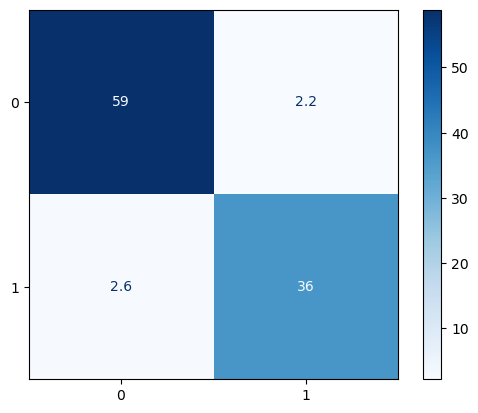

In [83]:
# Confusion matrix
# Random Forest Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
cm=confusion_matrix(y_test, rfc_predictions)
cm=(cm/1762*100)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

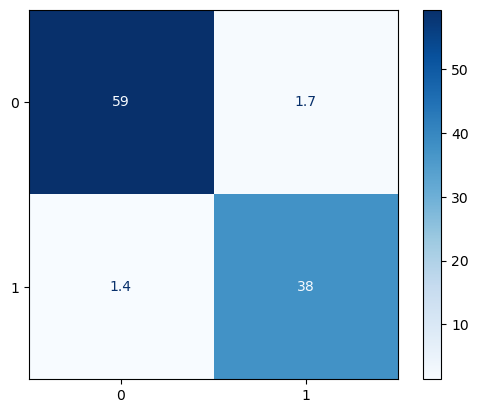

In [84]:
# Decision Tree Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
cm=confusion_matrix(y_test, dtree_predictions)
cm=(cm/1762*100)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

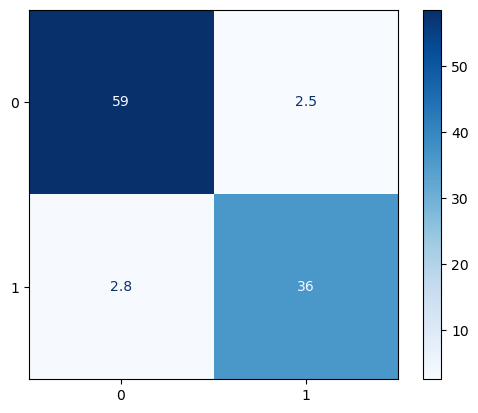

In [85]:
# AdaBoost Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
cm=confusion_matrix(y_test, AdaB_predictions)
cm=(cm/1762*100)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

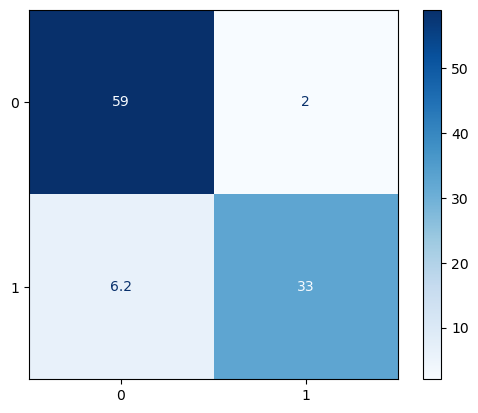

In [90]:
# Naive Bayes Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
cm=confusion_matrix(y_test, Naivebayes_pred)
cm=(cm/1762*100)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

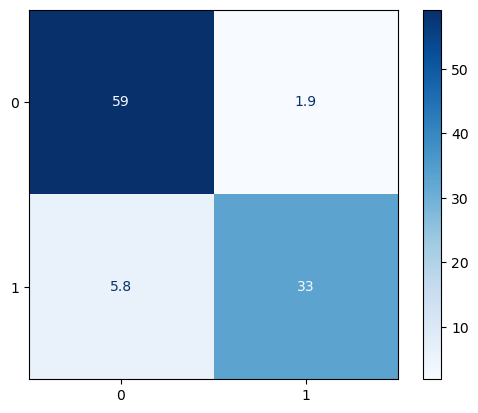

In [91]:
# Logistic Regression Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
cm=confusion_matrix(y_test, LR_predictions)
cm=(cm/1762*100)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (7).

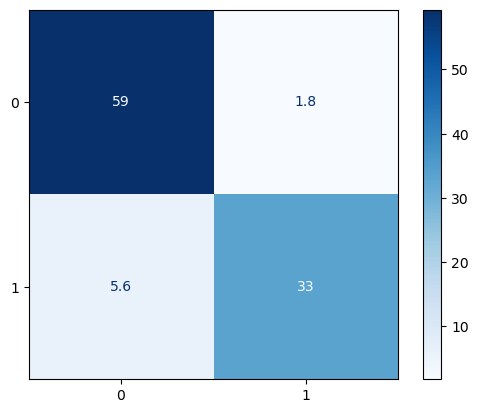

In [115]:
# SVC Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
cm=confusion_matrix(y_test, svc_pred)
cm=(cm/1762*100)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= "Outcome")
disp.plot(cmap=plt.cm.Blues)
plt.show()
